# Probability Distribution
## Binary Variable
    
**Bernoulli Distribution:** $\mathrm{Bern}(x \mid \mu) = \mu^x(1 - \mu)^{1 - x}$
* $\mathbb{E}[x] = \mu$
* $\mathrm{var}[x] = \mu(1 - \mu)$
* Likelihood Function: $$p(\mathcal{D} | \mu) = \prod_{n = 1}^N \mu^{x_n}(1 - \mu)^{1 - x_n}$$

So $\mu_{ML} = \frac{m}{N}$

**Binomial Distribution:** $\mathrm{Bin}(m \mid N, \mu) = \binom{N}{m} \mu^m(1-\mu)^{N - m}$

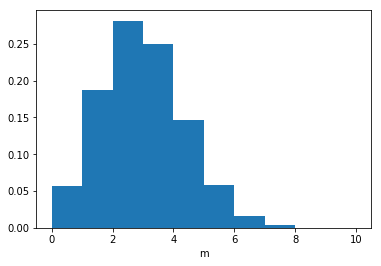

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
samples = np.random.binomial(10, 0.25, 100000)
plt.hist(samples, normed=True, range=(0, 10))
plt.xlabel('m')

It is easy to prove that binomial has:
* $\mathbb{E}[m] = N\mu$
* $\mathrm{var}[m] = N\mu(1 - \mu)$

**Beta Distribution:** $$\mathrm{Beta}(\mu \mid a, b) = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)}\mu^{a - 1}(1 - \mu)^{b - 1}$$

$$\Gamma(x) = \int^{\infty}_0 u^{x - 1}e^{-u}du$$

* $\mathbb{E}[\mu] = \frac{a}{a + b}$
* $\mathrm{var}[\mu] = \frac{ab}{(a + b)^2(a + b + 1)}$

## Polynomial Variable
If we use $\mu_k$ to represent the probability that $x_k = 1$, then
$$p(\mathbf{x} \mid \mathbf{\mu}) = \prod_{k = 1}^K \mu_k^{x_k}$$

so

$$\mathbb{E}[\mathbf{x} \mid \mathbf{\mu}] = \sum_{\mathbf{x}} p(\mathbf{x} \mid \mathbf{\mu}) = \mathbf{\mu}$$

### Gaussian Distribution
$$\mathcal{N}(x \mid \mu, \sigma^2) = \frac{1}{(2\pi\sigma^2)^{\frac{1}{2}}} \exp\{-\frac{1}{2\sigma^2}(x - \mu)^2\}$$

or

$$\mathcal{N}(\mathbf{x} \mid \mu, \sigma^2) = \frac{1}{(2\pi)^{\frac{D}{2}}} \frac{1}{|\Sigma|^{\frac{1}{2}}} \exp\{-\frac{1}{2\sigma^2}(\mathbf{x} - \mu)^T\Sigma^{-1} (\mathbf{x} - \mu)\}$$

so

* $\mathbb{E}[\mathbf{x}] = \mathbf{\mu}$
* $\mathbb{E}[\mathbf{xx}^T] = \mathbf{\mu\mu}^T + \mathbf{\Sigma}$
* $\mathrm{var}[\mathbf{x}] = \mathbf{\Sigma}$, which is called the covariance matrix.

Since $\Sigma$ has $\frac{D(D+1)}{2}$ free parameters, $\mu$ has D free parameters, so we usually only consider **diagonal covariance matrix** $\Sigma = \mathrm{diag}(\sigma^2_i)$ or **isotropic covariance matrix** $\Sigma = \sigma^2\mathbf{I}$

### Conditional Gaussian Distribution
Suppose $\mathbf{x}$ is a D-dimension vector under Gaussian Distribution, then divide $\mathbf{x}$ into two disjoint subsets. So
$$\mathbf{x} = \binom{\mathbf{x}_a}{\mathbf{x}_b}$$
$$\mathbf{\mu} = \binom{\mathbf{\mu}_a}{\mathbf{\mu}_b}$$
$$\Sigma = \begin{pmatrix}
               \Sigma_{aa} & \Sigma_{ab}\\
               \Sigma_{ba} & \Sigma_{bb}\\
           \end{pmatrix}$$
In many cases, it is convenient to use **precision matrix** $$\Lambda = \Sigma^{-1}$$

So $$\mu_{a \mid b} = \mu_a + \Sigma_{ab}\Sigma^{-1}_{bb}(\mathbf{x}_b - \mu_a)$$

$$\Sigma_{a \mid b} = \Sigma_{aa} + \Sigma_{ab}\Sigma^{-1}_{bb}\Sigma_{ba}$$

### Marginal Gaussian Distribution
$$p(\mathbf{x}_a) = \int p(\mathbf{x}_a, \mathbf{x}_b)d\mathbf{x}_b$$
* $\mathbb{E}[\mathbf{x}_a] = \mathbf{\mu}_a$
* $\mathrm{cov}[\mathbf{x}_a] = \Sigma_{aa}$

### Mixture Gaussian Distribution

Since Gaussian distribution only gives one peak, which sometimes does not reflect the real condition of given datasets, so we can use the linear combination of Gaussian distributions.

$$p(\mathbf{x}) = \sum_{k = 1}^K \pi_k\mathcal{N}(\mathbf{x} \mid \mu_k, \Sigma_k) = \sum_{k = 1}^K p(k)p(\mathbf{x} \mid k)$$

## Nonparametric Methods

Suppose there is a unknown probability density distribution in D dimension $p(\mathbf{x})$. Consider a small region $\mathcal{R}$ that contains $\mathbf{x}$, whose mass is 
$$P = \int_{\mathcal{R}}p(\mathbf{x})d\mathbf{x}$$

Suppose there are $N$ samples, then 
$$\mathrm{Bin}(K \mid N, P) = \binom{N}{K}P^K(1 - P)^{N - K}$$

which has
* $\mathbb{E}[\frac{K}{N}] = P$
* $\mathrm{var}[\frac{K}{N}] = \frac{P(1 - P)}{N}$

gives that there will be a peak near mean value when there is a large $N$, and $K \simeq NP$.

We also suppose that $P \simeq p(\mathbf{x})V$, so our approximation of density distribution has form $p(\mathbf{x}) = \frac{K}{NV}$. This means that $\mathcal{R}$ should be large enough to let binomial distribution reach the peak but should also be small enough so that the density is approximately a constant.

There are two ways to use this formula:
* **Kernel Method:** Keep $V$ unchanged and determine $K$ from data
* **K Nearest Neighbor:** Keep $K$ unchanged and determine $V$ from data


### Kernel Method
Define $$k(u) = \begin{cases}
                    1 & |u_i| \leq \frac{1}{2}, i = 1, \cdots, D\\
                    0 & \mathrm{othersize}
                \end{cases}$$

which is an example of **kernel function**.

The number of data in cube with center $\mathbf{x}$ and length of edge to be $h$ is:
    $$K = \sum_{n = 1}^{N} k\left(\frac{\mathbf{x} - \mathbf{x}_n}{h}\right)$$
    
So $$p(\mathbf{x}) = \frac{1}{N} \sum_{n = 1}^{N} \frac{1}{h^D} k\left(\frac{\mathbf{x} - \mathbf{x}_n}{h}\right)$$

To get a more smooth result, we can choose to use Gaussian kernel function and get
$$p(\mathbf{x}) = \frac{1}{N} \sum_{n = 1}^{N} \frac{1}{(2\pi h^2)^{\frac{D}{2}}} \exp\left\{-\frac{||\mathbf{x} - \mathbf{x}_n||^2}{2h^2}\right\}$$

Note that we can choose any $k(\mathbf{u})$ if:
\begin{align}
    &k(\mathbf{u}) \geq 0\nonumber\\
    &\int k(\mathbf{u})d\mathbf{u} = 1\nonumber
\end{align}

### K Nearest Neighbor
Suppose we have a dataset that $N_k$ data belongs to class $C_k$, the total number is $N$. If we want to catergorize a new $\mathbf{x}$. Then we draw a sphere centered at $\mathbf{x}$ that contains $K$ data points. Suppose the volume of the sphere is $V$, so
$$p(\mathbf{x} \mid C_k) = \frac{K_k}{N_kV}$$

$$p(\mathbf{x}) = \frac{K}{NV}$$

and class prior is

$$p(C_k) = \frac{N_k}{N}$$

so

$$p(C_k \mid x) = \frac{p(\mathbf{x} \mid C_k)p(C_k)}{p(\mathbf{x})} = \frac{K_k}{K}$$